In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data=pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')

In [3]:
data.head(1)

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   

        product_rating       overall_rating     brand  \
0  No rating available  No rating available  Elegance   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...

In [4]:
text_data=data.copy()

# On commence par créer une liste de stopwords

## On commence par la colonne url

In [5]:
#On récupère les textes
import re
def url(name):
    return ' '.join(re.split(r'\/|\.|-|\\|%|:',name))
text_url=' '.join(text_data['product_url'].apply(lambda x:url(x)))

In [6]:
text_url

'http   www flipkart com elegance polyester multicolor abstract eyelet door curtain p itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z http   www flipkart com sathiyas cotton bath towel p itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH http   www flipkart com eurospa cotton terry face towel set p itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y http   www flipkart com santosh royal fashion cotton printed king sized double bedsheet p itmejt9uaqahahuf?pid=BDSEJT9UQWHDUBH4 http   www flipkart com jaipur print cotton floral king sized double bedsheet p itmejthnwahrnt7v?pid=BDSEJTHNGWVGWWQU http   www flipkart com maserati time r8851116001 analog watch boys p itmeayahfma4r9kp?pid=WATEAYAHJ8CUCAYM http   www flipkart com camerii wm64 elegance analog watch men boys p itme6y6duhfcummh?pid=WATE6Y6D2MZHWGBZ http   www flipkart com t star uft tsw 005 bk br analog watch boys p itmecffvcgfw8f9m?pid=WATECFFVGFZPAD3D http   www flipkart com alfajr wy16b youth digital watch men boys p itmechfufumwbtnz?pid=WATECHFU4QGFQEJG http   www

## Puis le nom du produit

In [7]:
text_name=' '.join(text_data['product_name'])


In [8]:
text_data['product_category_tree']

0       ["Home Furnishing >> Curtains & Accessories >>...
1       ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
2       ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
3       ["Home Furnishing >> Bed Linen >> Bedsheets >>...
4       ["Home Furnishing >> Bed Linen >> Bedsheets >>...
                              ...                        
1045    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1046    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1047    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1048    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1049    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
Name: product_category_tree, Length: 1050, dtype: object

In [9]:
text_data['product_category_tree']=\
text_data['product_category_tree'].apply(lambda x: re.split(r'\["|>>|"\]',x))

In [10]:
text_data['product_category_tree'].apply(lambda x: len(x)).describe()

count    1050.000000
mean        6.204762
std         1.158126
min         4.000000
25%         5.000000
50%         6.000000
75%         7.000000
max         9.000000
Name: product_category_tree, dtype: float64

In [11]:
text_data['product_category_tree'].iloc[12]

['', 'Watches ', ' Wrist Watches ', ' Lois Caron Wrist Watches', '']

In [12]:
#On a donc un maximum de 8 catégories

In [13]:
for i in range(1,9):
    cat='categorie '+str(i)
    text_data[cat]=text_data['product_category_tree'].apply(lambda x: '' if len(x)<=i else x[i])


In [14]:
text_data.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  [, Home Furnishing ,  Curtains & Accessories ,...  CRNEG7BKMFFYHQ8Z   
1  [, Baby Care ,  Baby Bath & Skin ,  Baby Bath ...  BTWEGFZHGBXPHZUH   
2  [, Baby Care ,  Baby Bath & Skin ,  Baby Bath ...  BTWEG6SHXTDB2A2Y   
3  [, Home Furnishing ,  Bed Linen ,  Bedsheets ,...  BDSEJT9UQWHDUBH4   
4  [, Home Furnishing ,  Bed Linen ,  Bedsheets ,...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product  ...                  brand  \
0                    False  ...               Elegance   
1                    False  ...               Sathiyas   
2                    False  ...                Eurospa   
3                    False  ...  SANTOSH ROYAL FASHION   
4                    False  ...           Jaipur Print   

                              product_specifications       categorie 1  \
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing    
1  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care    
2  {"product_specification"=>[{"key"=>"Material",...        Baby Care    
3  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing    
4  {"product_specification"=>[{"key"=>"Machine Wa...  Home Furnishing    

                categorie 2         categorie 3  \
0   Curtains & Accessories            Curtains    
1         Baby Bath & Skin    Baby Bath Towels    
2         Baby Bath & Skin    Baby Bath Towels    
3                Bed Linen           Bedsheets    
4                Bed Linen           Bedsheets    

                                         categorie 4  \
0   Elegance Polyester Multicolor Abstract Eyelet...   
1                         Sathiyas Baby Bath Towels    
2                          Eurospa Baby Bath Towels    
3                   SANTOSH ROYAL FASHION Bedsheets    
4                            Jaipur Print Bedsheets    

                                         categorie 5 categorie 6 categorie 7  \
0                                                                              
1   Sathiyas Cotton Bath Towel (3 Bath Towel, Red...                           
2   Eurospa Cotton Terry Face Towel Set (20 PIECE...                           
3   SANTOSH ROYAL FASHION Cotton Printed King siz...                           
4   Jaipur Print Cotton Floral King sized Double ...                           

  categorie 8  
0              
1              
2              
3              
4              

[5 rows x 23 columns]

In [15]:
#On supprime des lignes inutiles pour l'étude du texte:
text_data.drop(['crawl_timestamp','pid','image','is_FK_Advantage_product'],axis=1,inplace=True)

In [16]:
text_categories=''
for i in range(1,9):
    cat='categorie '+str(i)
    text_categories+=' '
    text_categories+=' '.join(text_data[cat].unique())

In [17]:
text_categories

" Home Furnishing  Baby Care  Watches  Home Decor & Festive Needs  Kitchen & Dining  Beauty and Personal Care  Computers   Curtains & Accessories   Baby Bath & Skin   Bed Linen   Wrist Watches   Living Room Furnishing   Bath Linen   Candles & Fragrances   Tableware & Cutlery   Lighting   JMD Home Furnishing   Infant Wear   Kripa's Home Furnishing   Hair Care   Coffee Mugs   Network Components   Tablet Accessories   Cookware   Laptop Accessories   Makeup   Combos and Kits   Feeding & Nursing   Baby Bedding   Kitchen & Dining Linen   Containers & Bottles   Consumables & Disposables   Wall Decor & Clocks   Table Decor & Handicrafts   Flowers, Plants & Vases   Software   Showpieces   Furniture & Furnishings   Decorative Lighting & Lamps   Baby Grooming   Computer Peripherals   Cushions, Pillows & Covers   Storage   Health Care   Body and Skin Care   Kitchen Tools   TRUE Home Decor & Festive Needs  Living   Showpiece   Bar & Glassware   Fragrances   Women's Hygiene   Diapering & Potty Train

## On récupère les mots dans description

In [18]:
text_description=' '.join(text_data['description'])

In [19]:
text_description

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [20]:
text_data.head()

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   
1  7b72c92c2f6c40268628ec5f14c6d590   
2  64d5d4a258243731dc7bbb1eef49ad74   
3  d4684dcdc759dd9cdf41504698d737d8   
4  6325b6870c54cd47be6ebfbffa620ec7   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree  retail_price  \
0  [, Home Furnishing ,  Curtains & Accessories ,...        1899.0   
1  [, Baby Care ,  Baby Bath & Skin ,  Baby Bath ...         600.0   
2  [, Baby Care ,  Baby Bath & Skin ,  Baby Bath ...           NaN   
3  [, Home Furnishing ,  Bed Linen ,  Bedsheets ,...        2699.0   
4  [, Home Furnishing ,  Bed Linen ,  Bedsheets ,...        2599.0   

   discounted_price                                        description  \
0             899.0  Key Features of Elegance Polyester Multicolor ...   
1             449.0  Specifications of Sathiyas Cotton Bath Towel (...   
2               NaN  Key Features of Eurospa Cotton Terry Face Towe...   
3            1299.0  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4             698.0  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications       categorie 1  \
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing    
1  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care    
2  {"product_specification"=>[{"key"=>"Material",...        Baby Care    
3  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing    
4  {"product_specification"=>[{"key"=>"Machine Wa...  Home Furnishing    

                categorie 2         categorie 3  \
0   Curtains & Accessories            Curtains    
1         Baby Bath & Skin    Baby Bath Towels    
2         Baby Bath & Skin    Baby Bath Towels    
3                Bed Linen           Bedsheets    
4                Bed Linen           Bedsheets    

                                         categorie 4  \
0   Elegance Polyester Multicolor Abstract Eyelet...   
1                         Sathiyas Baby Bath Towels    
2                          Eurospa Baby Bath Towels    
3                   SANTOSH ROYAL FASHION Bedsheets    
4                            Jaipur Print Bedsheets    

                                         categorie 5 categorie 6 categorie 7  \
0                                                                              
1   Sathiyas Cotton Bath Towel (3 Bath Towel, Red...                           
2   Eurospa Cotton Terry Face Towel Set (20 PIECE...                           
3   SANTOSH ROYAL FASHION Cotton Printed King siz...                           
4   Jaipur Print Cotton Floral King sized Double ...                           

  categorie 8  
0              
1              
2              
3              
4

In [21]:
text_data.drop(['overall_rating','product_rating'],axis=1,inplace=True)

## On passe à la spécification produit

In [22]:
text_data['product_specifications'].unique()

array(['{"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"}, {"key"=>"Designed For", "value"=>"Door"}, {"key"=>"Type", "value"=>"Eyelet"}, {"key"=>"Model Name", "value"=>"Abstract Polyester Door Curtain Set Of 2"}, {"key"=>"Model ID", "value"=>"Duster25"}, {"key"=>"Color", "value"=>"Multicolor"}, {"key"=>"Length", "value"=>"213 cm"}, {"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 2"}, {"key"=>"Sales Package", "value"=>"2 Curtains"}, {"key"=>"Material", "value"=>"Polyester"}]}',
       '{"product_specification"=>[{"key"=>"Machine Washable", "value"=>"Yes"}, {"key"=>"Material", "value"=>"Cotton"}, {"key"=>"Design", "value"=>"Self Design"}, {"key"=>"Brand", "value"=>"Sathiyas"}, {"key"=>"Type", "value"=>"Bath Towel"}, {"key"=>"GSM", "value"=>"500"}, {"key"=>"Model Name", "value"=>"Sathiyas cotton bath towel"}, {"key"=>"Ideal For", "value"=>"Men, Women, Boys, Girls"}, {"key"=>"Model ID", "value"=>"asvtwl322"}, {"key"=>"Color", "value"=>"Red, Yellow, Blue"}, {

In [23]:
def dico(x):
    d={}
    pattern=re.compile(r'"key"=>"(\w+)", "value"=>"(\w+)"')
    matches=pattern.findall(x)
    for i in matches:
        d[i[0]]=i[1]
    return d


In [24]:
def spec(x):
    pattern=re.compile(r'=>"(\w+)"')
    matches=pattern.findall(x)
    return ' '.join(matches)

In [25]:
text_data.head()

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   
1  7b72c92c2f6c40268628ec5f14c6d590   
2  64d5d4a258243731dc7bbb1eef49ad74   
3  d4684dcdc759dd9cdf41504698d737d8   
4  6325b6870c54cd47be6ebfbffa620ec7   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree  retail_price  \
0  [, Home Furnishing ,  Curtains & Accessories ,...        1899.0   
1  [, Baby Care ,  Baby Bath & Skin ,  Baby Bath ...         600.0   
2  [, Baby Care ,  Baby Bath & Skin ,  Baby Bath ...           NaN   
3  [, Home Furnishing ,  Bed Linen ,  Bedsheets ,...        2699.0   
4  [, Home Furnishing ,  Bed Linen ,  Bedsheets ,...        2599.0   

   discounted_price                                        description  \
0             899.0  Key Features of Elegance Polyester Multicolor ...   
1             449.0  Specifications of Sathiyas Cotton Bath Towel (...   
2               NaN  Key Features of Eurospa Cotton Terry Face Towe...   
3            1299.0  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4             698.0  Key Features of Jaipur Print Cotton Floral Kin...   

                   brand                             product_specifications  \
0               Elegance  {"product_specification"=>[{"key"=>"Brand", "v...   
1               Sathiyas  {"product_specification"=>[{"key"=>"Machine Wa...   
2                Eurospa  {"product_specification"=>[{"key"=>"Material",...   
3  SANTOSH ROYAL FASHION  {"product_specification"=>[{"key"=>"Brand", "v...   
4           Jaipur Print  {"product_specification"=>[{"key"=>"Machine Wa...   

        categorie 1               categorie 2         categorie 3  \
0  Home Furnishing    Curtains & Accessories            Curtains    
1        Baby Care          Baby Bath & Skin    Baby Bath Towels    
2        Baby Care          Baby Bath & Skin    Baby Bath Towels    
3  Home Furnishing                 Bed Linen           Bedsheets    
4  Home Furnishing                 Bed Linen           Bedsheets    

                                         categorie 4  \
0   Elegance Polyester Multicolor Abstract Eyelet...   
1                         Sathiyas Baby Bath Towels    
2                          Eurospa Baby Bath Towels    
3                   SANTOSH ROYAL FASHION Bedsheets    
4                            Jaipur Print Bedsheets    

                                         categorie 5 categorie 6 categorie 7  \
0                                                                              
1   Sathiyas Cotton Bath Towel (3 Bath Towel, Red...                           
2   Eurospa Cotton Terry Face Towel Set (20 PIECE...                           
3   SANTOSH ROYAL FASHION Cotton Printed King siz...                           
4   Jaipur Print Cotton Floral King sized Double ...                           

  categorie 8  
0              
1              
2              
3              
4

In [26]:
def spec(x):
    pattern=re.compile(r'=>"(\w+)"')
    matches=pattern.findall(x)
    return ' '.join(matches)
text_data['product_specifications'].fillna('').apply(lambda x:spec(x))
spec_words=' '.join(text_data['product_specifications'].fillna('').apply(lambda x:spec(x)))

In [27]:
spec_words=' '.join(text_data['product_specifications'].fillna('').apply(lambda x:spec(x)))

In [28]:
#Ca y est j'ai récupéré tous les mots qui m'intéréssaient
#je les concatène:
words=(spec_words+' '+text_description+' '+text_categories+' '+text_name).lower()

In [29]:
#On va passer par regex pour supprimer les nombres seuls et les ponctuations 
#??(Je veux conserver les 4d ou A5)??
import nltk
sw = set()
sw.update(tuple(nltk.corpus.stopwords.words('english')))
tokenizer = nltk.RegexpTokenizer(r'[A-Za-z0-9]{2,}')
corpus=tokenizer.tokenize(words)

In [30]:
len(corpus)

100939

In [31]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


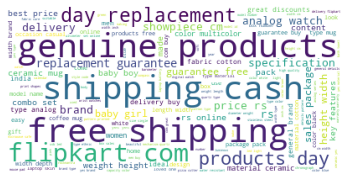

In [32]:
#Je regarde les fréquences:


from wordcloud import WordCloud
wordcloud = WordCloud(stopwords=sw, background_color="white")
wordcloud.generate(" ".join(corpus))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [33]:
text_data['categorie 1'].unique()

array(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '], dtype=object)

In [34]:
freq_words=['flipkart','com','replacement','day','genuine','products','pid','http','www','cash','shipping','free']
len(sw)

179

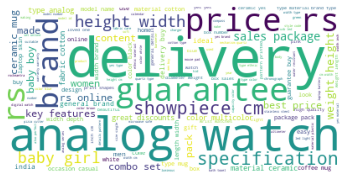

In [35]:
sw.update(tuple(freq_words))

#On regarde à nouveau:
wordcloud.generate(" ".join(corpus))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()



In [36]:

#on garde rs par exemple, marque de composant électronique et cm qui peut représenter une discrimination entre catégorie
freq_words=['delivery','price','specification','brand','online','best','price','made',\
            'sales','package','buy','type','pack','ideal','guarantee','great','gift','showpiece']
len(sw)

191

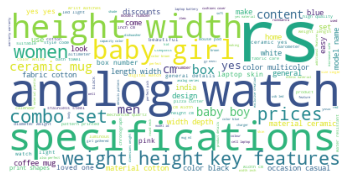

In [37]:
sw.update(tuple(freq_words))

#On regarde à nouveau:
wordcloud.generate(" ".join(corpus))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


#on garde rs par exemple, marque de composant électronique et cm qui peut représenter une discrimination entre catégorie

In [38]:
freq_words=['name','discounts','use','specifications','prices','content','set','general','model','easy']
len(sw)

208

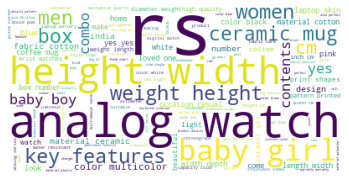

In [39]:
sw.update(tuple(freq_words))

#On regarde à nouveau:
wordcloud.generate(" ".join(corpus))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


#on garde rs par exemple, marque de composant électronique et cm qui peut représenter une discrimination entre catégorie

In [40]:
freq_words=['contents']
len(sw)

218

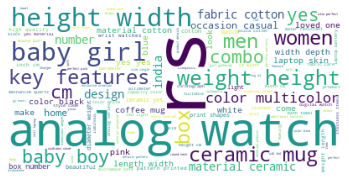

In [41]:
sw.update(tuple(freq_words))

#On regarde à nouveau:
wordcloud.generate(" ".join(corpus))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


#on garde rs par exemple, marque de composant électronique et cm qui peut représenter une discrimination entre catégorie

In [42]:
freq_words=['occasion','casual','yes']
len(sw)

219

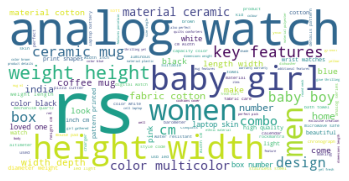

In [43]:
#Maintenant que l'on a notre base de stopwords, on va passer à la lemmetization/stemmeatisation
sw.update(tuple(freq_words))

#On regarde à nouveau:
wordcloud.generate(" ".join(corpus))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


#on garde rs par exemple, marque de composant électronique et cm qui peut représenter une discrimination entre catégorie

In [44]:
freq_words=['white','black','color']
len(sw)

222

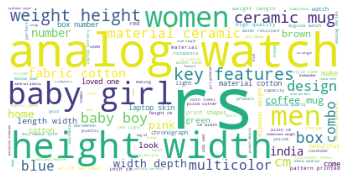

In [45]:
#Maintenant que l'on a notre base de stopwords, on va passer à la lemmetization/stemmeatisation
sw.update(tuple(freq_words))

#On regarde à nouveau:
wordcloud.generate(" ".join(corpus))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


#on garde rs par exemple, marque de composant électronique et cm qui peut représenter une discrimination entre catégorie

In [46]:
#Il y a des mots agglomérés dans le corpus, on les regarde:
long=[]
for i in corpus:
    if len(i)>10 and i not in long:
        long.append(i)
len(long)

366

In [47]:
long

['shuvam20pcftsetassorted',
 'chronograph',
 'r8851116001',
 'contemporary',
 'embroidered',
 'bnw3x10rlgla',
 'temperature',
 'certification',
 'conditioning',
 'replacement',
 'multicolour',
 'hgfvscgstgry00094',
 'eternity001007',
 'composition',
 'mb1043sf4056',
 'tabledecorativebowl1',
 'polypropylene',
 'shoppingtara',
 'interiordesign',
 'tiedribbons',
 'mothersdaytile041',
 'maganbuddha',
 'paniarakkal',
 'mothersdaytile024',
 'ruchikainternational',
 '10btsc2012gb',
 'dreamshomes',
 'jayenterprise',
 'homedesires',
 'brilliantcolor',
 'multipurpose',
 'scalabedding',
 'aci20160340',
 'giftsthatwow',
 '56213kls215',
 '56213kls213',
 '56213kls230',
 'ideapadl08o6c02',
 'lgswatches760sl',
 'illuminator',
 'mayursflora',
 'randmshoppee',
 'boysiigirls',
 's16184wbz006',
 'transparency',
 '8904214703639',
 'architecture',
 'hzcn0500541',
 'bornbabykids',
 'handloomhub',
 'pinkpolkahat',
 'rectangular',
 '929001120614',
 'polycarbonate',
 'houseattire',
 'rajasthanikart',
 'golmaals

# Nettoyage complémentaire

In [48]:
#On va comparer plusieurs options sur qq lignes du tableau pour sélectionner celui qui nous semble le plus
#pertinent:
text_data.head(1)

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   

                               product_category_tree  retail_price  \
0  [, Home Furnishing ,  Curtains & Accessories ,...        1899.0   

   discounted_price                                        description  \
0             899.0  Key Features of Elegance Polyester Multicolor ...   

      brand                             product_specifications  \
0  Elegance  {"product_specification"=>[{"key"=>"Brand", "v...   

        categorie 1               categorie 2 categorie 3  \
0  Home Furnishing    Curtains & Accessories    Curtains    

                                         categorie 4 categorie 5 categorie 6  \
0   Elegance Polyester Multicolor Abstract Eyelet...                           

  categorie 7 categorie 8  
0

In [49]:
text_data.isnull().sum()

uniq_id                     0
product_url                 0
product_name                0
product_category_tree       0
retail_price                1
discounted_price            1
description                 0
brand                     338
product_specifications      1
categorie 1                 0
categorie 2                 0
categorie 3                 0
categorie 4                 0
categorie 5                 0
categorie 6                 0
categorie 7                 0
categorie 8                 0
dtype: int64

In [50]:
#On commence par regrouper dans une colonne l'ensemble des mots de chaque ligne dont on a enlevé les stopwords:

def cleaning(name,category,description,specs):
    name_clean = name
    category_clean = ' '.join(category)
    description_clean = description
    spec_clean=spec(specs)
    words = ' '.join([name_clean, category_clean, description_clean, spec_clean])
    words_clean = re.sub('[^A-Za-z ]','', words) #au final j'enlève les mots avec des nombres
    words_clean = re.sub('\s+',' ', words_clean) #j'enlève les espaces en trop
    words_list = words_clean.split(' ')
    return ' '.join([w.lower() for w in words_list if w not in sw])

In [51]:
text_data['words_string'] = np.vectorize(cleaning)(text_data['product_name'], \
                                                   text_data['product_category_tree'], \
                                                   text_data['description'],\
                                                  text_data['product_specifications'].fillna(''))
text_data.head()

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   
1  7b72c92c2f6c40268628ec5f14c6d590   
2  64d5d4a258243731dc7bbb1eef49ad74   
3  d4684dcdc759dd9cdf41504698d737d8   
4  6325b6870c54cd47be6ebfbffa620ec7   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree  retail_price  \
0  [, Home Furnishing ,  Curtains & Accessories ,...        1899.0   
1  [, Baby Care ,  Baby Bath & Skin ,  Baby Bath ...         600.0   
2  [, Baby Care ,  Baby Bath & Skin ,  Baby Bath ...           NaN   
3  [, Home Furnishing ,  Bed Linen ,  Bedsheets ,...        2699.0   
4  [, Home Furnishing ,  Bed Linen ,  Bedsheets ,...        2599.0   

   discounted_price                                        description  \
0             899.0  Key Features of Elegance Polyester Multicolor ...   
1             449.0  Specifications of Sathiyas Cotton Bath Towel (...   
2               NaN  Key Features of Eurospa Cotton Terry Face Towe...   
3            1299.0  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4             698.0  Key Features of Jaipur Print Cotton Floral Kin...   

                   brand                             product_specifications  \
0               Elegance  {"product_specification"=>[{"key"=>"Brand", "v...   
1               Sathiyas  {"product_specification"=>[{"key"=>"Machine Wa...   
2                Eurospa  {"product_specification"=>[{"key"=>"Material",...   
3  SANTOSH ROYAL FASHION  {"product_specification"=>[{"key"=>"Brand", "v...   
4           Jaipur Print  {"product_specification"=>[{"key"=>"Machine Wa...   

        categorie 1               categorie 2         categorie 3  \
0  Home Furnishing    Curtains & Accessories            Curtains    
1        Baby Care          Baby Bath & Skin    Baby Bath Towels    
2        Baby Care          Baby Bath & Skin    Baby Bath Towels    
3  Home Furnishing                 Bed Linen           Bedsheets    
4  Home Furnishing                 Bed Linen           Bedsheets    

                                         categorie 4  \
0   Elegance Polyester Multicolor Abstract Eyelet...   
1                         Sathiyas Baby Bath Towels    
2                          Eurospa Baby Bath Towels    
3                   SANTOSH ROYAL FASHION Bedsheets    
4                            Jaipur Print Bedsheets    

                                         categorie 5 categorie 6 categorie 7  \
0                                                                              
1   Sathiyas Cotton Bath Towel (3 Bath Towel, Red...                           
2   Eurospa Cotton Terry Face Towel Set (20 PIECE...                           
3   SANTOSH ROYAL FASHION Cotton Printed King siz...                           
4   Jaipur Print Cotton Floral King sized Double ...                           

  categorie 8                                       words_string  
0              elegance polyester multicolor abstract eyelet ...  
1              sathiyas cotton bath towel baby care baby bath...  
2              eurospa cotton terry face towel set baby care ...  
3              santosh royal fashion cotton printed king size...  
4              jaipur print cotton floral king sized double b...

In [52]:
new_corpus=' '.join(text_data['words_string'])

In [53]:
new_corpus

'elegance polyester multicolor abstract eyelet door curtain home furnishing curtains accessories curtains elegance polyester multicolor abstract eyelet do key features elegance polyester multicolor abstract eyelet door curtain floral curtainelegance polyester multicolor abstract eyelet door curtain cm height pack price rs this curtain enhances look interiorsthis curtain high quality polyester fabricit features eyelet style stitch metal ringit makes room environment romantic lovingthis curtain ant wrinkle anti shrinkage elegant apparancegive home bright modernistic appeal designs the surreal attention sure steal hearts these contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlightspecifications elegance polyester multicolor abstract eyelet door curt

In [54]:
#Il y a pas mal de mots soit fusionné soient issuent probablement des adresses url
#on va traiter cela
#je re tokenize
corpus=nltk.word_tokenize(new_corpus)

In [55]:
len(corpus)

86402

In [56]:
pd.Series(corpus).value_counts().describe()

count    6146.000000
mean       14.058249
std        53.941464
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max      1026.000000
dtype: float64

In [57]:
#on va commencer par enlever les long string qui ne veulent rien dire:
L=[]
for i in corpus:
    if len(i)>22:
        L.append(i)
L

['pyjamasetspecifications',
 'appiosandroidspecifications',
 'challengesspecification',
 'salwarblackspecifications',
 'easytocleanspecifications',
 'camouflagespecifications',
 'durabilityspecifications',
 'hairstylingspecifications',
 'glasswarespecifications',
 'responsibilityspecifications',
 'sleepsuitspecifications',
 'propertiesspecifications',
 'glasswarespecifications',
 'multipurposegiftsthatwow',
 'attachmentspecifications',
 'crafteddecorativewashablegift',
 'cottonpolyesterelastane',
 'rajasthanspecifications',
 'interiorsspecifications',
 'siestaspecificationsproduct',
 'siestaspecificationsproduct',
 'techniquesspecifications',
 'troublesomespecifications',
 'reflectionsspecifications',
 'goodnightangelsleepwellpics',
 'goodnightangelsleepwellpics',
 'goodnightangelsleepwellpics',
 'lastinggoodnightangelsleepwellpics',
 'goodnightangelsleepwellpics',
 'paintingartcouplelovedance',
 'paintingartcouplelovedance',
 'paintingartcouplelovedance',
 'printingpaintingartcouplelo

In [58]:
stopw=L

In [59]:
#on va déjà enlever ces mots de la colonne:
def clean(x):
    x.split(' ')
    

In [60]:
def cleaning(urls,name,category,description,specs):
    url_clean = url(urls)
    name_clean = name
    category_clean = ' '.join(category)
    description_clean = description
    spec_clean=spec(specs)
    words = ' '.join([url_clean, name_clean, category_clean, description_clean, spec_clean])
    words_clean = re.sub('[^A-Za-z ]',' ', words) #au final j'enlève les mots avec des nombres
    words_clean = re.sub('[A-Za-z]{26,}',' ', words_clean) #J'enlève les mots trop long des url
    words_clean = re.sub('\s+',' ', words_clean) #j'enlève les espaces en trop
    words_list = words_clean.split(' ')
    return ' '.join([w.lower() for w in words_list if w.lower() not in sw])

In [61]:
text_data['words_string'] = np.vectorize(cleaning)(text_data['product_url'], \
                                                   text_data['product_name'], \
                                                   text_data['product_category_tree'], \
                                                   text_data['description'],\
                                                  text_data['product_specifications'].fillna(''))
text_data.head(1)

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   

                               product_category_tree  retail_price  \
0  [, Home Furnishing ,  Curtains & Accessories ,...        1899.0   

   discounted_price                                        description  \
0             899.0  Key Features of Elegance Polyester Multicolor ...   

      brand                             product_specifications  \
0  Elegance  {"product_specification"=>[{"key"=>"Brand", "v...   

        categorie 1               categorie 2 categorie 3  \
0  Home Furnishing    Curtains & Accessories    Curtains    

                                         categorie 4 categorie 5 categorie 6  \
0   Elegance Polyester Multicolor Abstract Eyelet...                           

  categorie 7 categorie 8                                       words_string  
0                          elegance polyester multicolor abstract eyelet ...

In [62]:
new_corpus=' '.join(text_data['words_string'])


In [63]:
new_corpus

'elegance polyester multicolor abstract eyelet door curtain p itmeg bkzdgthcts crneg bkmffyhq z elegance polyester multicolor abstract eyelet door curtain home furnishing curtains accessories curtains elegance polyester multicolor abstract eyelet key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain cm height rs curtain enhances look interiors curtain high quality polyester fabric features eyelet style stitch metal ring makes room environment romantic loving curtain ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal designs surreal attention sure steal hearts contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight elegance poly

In [64]:
corpus=nltk.word_tokenize(new_corpus)

In [65]:
len(corpus)

81217

In [66]:
#c'est mieux maintenant on va regarder les mots qui ne sont pas séparés:
#on va commencer par enlever les long string qui ne veulent rien dire:
L=[]
for i in corpus:
    if len(i)>15:
        L.append(i)
L

['itmegfzhxbyucwgn',
 'btwegfzhgbxphzuh',
 'bdsejthngwvgwwqu',
 'itmechfufumwbtnz',
 'watecgpsdsfrhusy',
 'itmebyjafvbzhzzm',
 'itmeckycadzqydqw',
 'wateckyccmxuqqms',
 'itmejjexzqffezrf',
 'dstejjexfwxkbdym',
 'itmejhvezqqfgrhm',
 'airedjgyahpbxtzs',
 'jgtectxnjjfcucjk',
 'itmejmhzjcgyabvh',
 'cpcejmhzehtqfacn',
 'mugegzumnzckbzys',
 'mugegzuhavshpxst',
 'mugegzumzyqgwhds',
 'itmejpqhtbjhffpc',
 'itmeabfpyecrxhgs',
 'vaneabfpkggztyvq',
 'itmegumhhxdjcgkr',
 'btcejqynbkznzdks',
 'itmehsmfzshkqsjz',
 'bwlehtbphrbsdeyf',
 'tcvehsmfyeqgrtaz',
 'srtehqfqxgyqgggh',
 'srtehhxgevdqmeqv',
 'shieghnczbrtkzcr',
 'itmegpnxaduhzwgx',
 'coaejftzefvytvbg',
 'shieavzqquwkyurz',
 'itmebbwhhgcsndbu',
 'goldencollections',
 'goldencollections',
 'goldencollections',
 'goldencollections',
 'goldencollections',
 'itmebwnufyzxwacs',
 'itmehgxgfgsxgshd',
 'itmegrskechgxsth',
 'itmehuebxuekgvgt',
 'bolehuebrtvcgwmk',
 'inkdygggbyxzxybz',
 'itmejwjknxxprfpr',
 'accejwjkzagjfwcb',
 'itmeaceybbrhdpsa',
 'itmeag

In [67]:
#c'est mieux maintenant on va regarder les mots qui ne sont pas séparés:
#on va commencer par enlever les long string qui ne veulent rien dire:
L=[]
for i in corpus:
    if len(i)>15 and i!='bttonflwrbeigerust' and i!='ruchikainternational' and i!='tabledecorativebowl':
        L.append(i)
L

['itmegfzhxbyucwgn',
 'btwegfzhgbxphzuh',
 'bdsejthngwvgwwqu',
 'itmechfufumwbtnz',
 'watecgpsdsfrhusy',
 'itmebyjafvbzhzzm',
 'itmeckycadzqydqw',
 'wateckyccmxuqqms',
 'itmejjexzqffezrf',
 'dstejjexfwxkbdym',
 'itmejhvezqqfgrhm',
 'airedjgyahpbxtzs',
 'jgtectxnjjfcucjk',
 'itmejmhzjcgyabvh',
 'cpcejmhzehtqfacn',
 'mugegzumnzckbzys',
 'mugegzuhavshpxst',
 'mugegzumzyqgwhds',
 'itmejpqhtbjhffpc',
 'itmeabfpyecrxhgs',
 'vaneabfpkggztyvq',
 'itmegumhhxdjcgkr',
 'btcejqynbkznzdks',
 'itmehsmfzshkqsjz',
 'bwlehtbphrbsdeyf',
 'tcvehsmfyeqgrtaz',
 'srtehqfqxgyqgggh',
 'srtehhxgevdqmeqv',
 'shieghnczbrtkzcr',
 'itmegpnxaduhzwgx',
 'coaejftzefvytvbg',
 'shieavzqquwkyurz',
 'itmebbwhhgcsndbu',
 'goldencollections',
 'goldencollections',
 'goldencollections',
 'goldencollections',
 'goldencollections',
 'itmebwnufyzxwacs',
 'itmehgxgfgsxgshd',
 'itmegrskechgxsth',
 'itmehuebxuekgvgt',
 'bolehuebrtvcgwmk',
 'inkdygggbyxzxybz',
 'itmejwjknxxprfpr',
 'accejwjkzagjfwcb',
 'itmeaceybbrhdpsa',
 'itmeag

In [68]:
sw.update(set(L))

In [69]:
sw

{'a',
 'about',
 'above',
 'accdqdybdnzrpmsw',
 'accdqdybqzpeexty',
 'accdqdybyvqznhch',
 'accdxfzxsfthcqcr',
 'accejwjkzagjfwcb',
 'after',
 'again',
 'against',
 'ain',
 'airedjgyahpbxtzs',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'bdsegupcqzvxepaf',
 'bdsegzcetasfksbf',
 'bdsejthngwvgwwqu',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'beoegxrvqpckjhyc',
 'best',
 'between',
 'bibejcbyftqdkznt',
 'black',
 'bladzekghbgjbmfy',
 'blaeawaaskhytegv',
 'blaecqtushnafjag',
 'blaedsgqxruyfxma',
 'blaeeaawgkxcxjhx',
 'blaeegthfyhfffug',
 'bmbehpaggdssymuz',
 'boleervfvnynwtgf',
 'bolegzxaxyhajmzy',
 'bolehuebrtvcgwmk',
 'boteanchdnkdtkgh',
 'boteanchdyhqhhbt',
 'both',
 'brand',
 'btcejqynbkznzdks',
 'btwdszqtjtxgbgpu',
 'btwebryfpzqdcgjc',
 'btwecdbwtuetcfck',
 'btwedgmrhgqzkrzr',
 'btwegfzhgbxphzuh',
 'but',
 'buy',
 'bwlehtbphrbsdeyf',
 'by',
 'cagebfpetzzdwebz',
 'cagebtgezymkvzqv',
 'cagebtjbrfgauqqb',
 'cagebtjbtnggdzqz',
 'cageyu

In [70]:
#On recleane

In [71]:
text_data['words_string'] = np.vectorize(cleaning)(text_data['product_url'], \
                                                   text_data['product_name'], \
                                                   text_data['product_category_tree'], \
                                                   text_data['description'],\
                                                  text_data['product_specifications'].fillna(''))
text_data.head(1)

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   

                               product_category_tree  retail_price  \
0  [, Home Furnishing ,  Curtains & Accessories ,...        1899.0   

   discounted_price                                        description  \
0             899.0  Key Features of Elegance Polyester Multicolor ...   

      brand                             product_specifications  \
0  Elegance  {"product_specification"=>[{"key"=>"Brand", "v...   

        categorie 1               categorie 2 categorie 3  \
0  Home Furnishing    Curtains & Accessories    Curtains    

                                         categorie 4 categorie 5 categorie 6  \
0   Elegance Polyester Multicolor Abstract Eyelet...                           

  categorie 7 categorie 8                                       words_string  
0                          elegance polyester multicolor abstract eyelet ...

In [72]:
new_corpus=' '.join(text_data['words_string'])


In [73]:
corpus=nltk.word_tokenize(new_corpus)

In [74]:
len(corpus)

80928

In [75]:
#c'est mieux maintenant on va regarder les mots qui ne sont pas séparés:
#on va commencer par enlever les long string qui ne veulent rien dire:
L=[]
for i in corpus:
    if len(i)>12:
        L.append(i)
L

['pcftsetassorted',
 'pcftsetassorted',
 'pcftsetassorted',
 'pcftsetassorted',
 'itmejthnwahrnt',
 'manufacturing',
 'watecffvgfzpad',
 'sophistication',
 'sophistication',
 'wateayzjbfjxb',
 'itmectxngukgmk',
 'characteristics',
 'unforgettable',
 'unforgettable',
 'unforgettable',
 'certification',
 'certification',
 'itmegzuhhukxghr',
 'unforgettable',
 'unforgettable',
 'manufacturing',
 'representations',
 'tcvehsmfagatw',
 'itmehsmfvavntx',
 'manufacturing',
 'understanding',
 'comprehensive',
 'manufacturing',
 'shiebbwhsyhsvv',
 'craftsmanship',
 'itmdygggeaqra',
 'intrferential',
 'electrotherapy',
 'intrferential',
 'electrotherapy',
 'electrotherapy',
 'electrotherapy',
 'intrferential',
 'intrferential',
 'electrotherapy',
 'itmdszqssfsmkr',
 'illustrations',
 'illustrations',
 'illustrations',
 'itmeaggkhrdfk',
 'mugeaggkzfgyhz',
 'itmeaggkgsmhb',
 'itmeaggkphzdq',
 'mugeaggkmugxq',
 'mugeaggkxfjdbz',
 'pscychological',
 'pscychological',
 'pscychological',
 'itmeaggkuuty

In [76]:
#on va enlever les specifications de ces mots;

'ft' in corpus

True

In [77]:
re.sub(r'([a-z]+)specification[a-z]*',r'\1','sunlightspecifications cmsspecification shuvampcftsetassorted')

'sunlight cms shuvampcftsetassorted'

In [78]:
def cleaning2(x):
    #on traite les mots individuellement
    x=re.sub(r'pcftsetassorted','pc ft set assorted',x)
    x=re.sub('intrferential','interferential',x)
    x=re.sub('ccsmallfloral','cc small floral',x)
    return x

In [79]:
new_corpus=cleaning2(new_corpus)
corpus=nltk.word_tokenize(new_corpus)
L=[]
for i in corpus:
    if len(i)>15:
        L.append(i)
L

['tabledecorativebowl',
 'ruchikainternational',
 'ruchikainternational',
 'ruchikainternational',
 'ruchikainternational',
 'ruchikainternational',
 'ruchikainternational',
 'ruchikainternational',
 'ruchikainternational',
 'ruchikainternational',
 'ruchikainternational',
 'ruchikainternational',
 'ruchikainternational',
 'bttonflwrbeigerust']

In [80]:
#On applique ce cleaning à la colonne de texte:
text_data['words_string']=text_data['words_string'].apply(lambda x:cleaning2(x))

##  Stemming/Lemmatization

In [81]:
test_data=text_data.sample(10)
test_data['categorie 1'].unique()

array(['Home Furnishing ', 'Watches ', 'Computers ', 'Baby Care ',
       'Beauty and Personal Care ', 'Kitchen & Dining ',
       'Home Decor & Festive Needs '], dtype=object)

In [82]:
#On a toutes les catégories
#on récupère le texte
test='\n'.join(test_data['words_string'])

In [83]:
test

'pioneer pragati floral single duvet orange p itmedan bban yfx blaedan hxg cahd pioneer pragati floral single duvet orange home furnishing bed linen blankets quilts dohars pioneer pragati floral single duvet orange duvet rs world famous jaipuri pure cotton single bed comforter also populary called dohar traditional sanganeri gold print rajasthan comforter layered cover fluffy middle layer high grade flannel sheet two layers cotton fabric light weight travelling product usage envelop folds unique decorative comforter drift exotic lands ensconced within folds buttery soft cotton comforter sleep sweet deep whether choose spend nights cocooned warm cozy slumber choose indulge restful afternoon siesta product dimensions lxb x inches item single bed comforter multicolor material cloth specialty gold print floral design quilt filling high grade flannel sheet fabric gsm wash care dryclean disclaimer item handmade fine design pattern tone product may vary slightly shown image however would comp

In [84]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [86]:
#testons plusieurs Stemmer et voyons ce que ça donne:

#Stemmer
from nltk.stem import LancasterStemmer
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer

stem=LancasterStemmer()

def modif(texte,stemmer):
    count=0
    dico={}
    for mot in nltk.word_tokenize(texte):
        stemm=stemmer
        m=stemm.stem(mot)
        if m!=mot:
            count+=1
            if m in dico:
                if mot not in dico[m]:
                    dico[m].append(mot)
            else :
                dico[m]=[mot]
    
    return len(dico),count
               



In [87]:
L=[LancasterStemmer(),PorterStemmer(),SnowballStemmer("english")]
Name=['Lancaster','Porter','Snowball']

for i in range(3):
    print(Name[i],modif(test,L[i]))

Lancaster (207, 579)
Porter (155, 401)
Snowball (151, 388)


In [88]:
#Lancaster parait plus efficace mais regardons les différences:
def modif2(texte):
    L=[LancasterStemmer(),PorterStemmer(),SnowballStemmer("english")]
    Name=['Lancaster','Porter','Snowball']
    dico={}
    for i in range(3):
        count=0
        for mot in nltk.word_tokenize(texte):
            stemm=L[i]
            m=stemm.stem(mot)
            if m!=mot:
                if mot in dico:
                    if Name[i] not in dico[mot]:
                        dico[mot][Name[i]]=m
                else:
                    dico[mot]={Name[i]:m}
    
    return dico


In [89]:
modif2(test)

{'pioneer': {'Lancaster': 'pion'},
 'pragati': {'Lancaster': 'pragat'},
 'floral': {'Lancaster': 'flor'},
 'single': {'Lancaster': 'singl', 'Porter': 'singl', 'Snowball': 'singl'},
 'orange': {'Lancaster': 'orang', 'Porter': 'orang', 'Snowball': 'orang'},
 'itmedan': {'Lancaster': 'itm'},
 'blaedan': {'Lancaster': 'bla'},
 'home': {'Lancaster': 'hom'},
 'furnishing': {'Lancaster': 'furn',
  'Porter': 'furnish',
  'Snowball': 'furnish'},
 'linen': {'Lancaster': 'lin'},
 'blankets': {'Lancaster': 'blanket',
  'Porter': 'blanket',
  'Snowball': 'blanket'},
 'quilts': {'Lancaster': 'quilt', 'Porter': 'quilt', 'Snowball': 'quilt'},
 'dohars': {'Lancaster': 'doh', 'Porter': 'dohar', 'Snowball': 'dohar'},
 'famous': {'Lancaster': 'fam', 'Porter': 'famou'},
 'jaipuri': {'Lancaster': 'jaipur'},
 'pure': {'Lancaster': 'pur'},
 'comforter': {'Lancaster': 'comfort',
  'Porter': 'comfort',
  'Snowball': 'comfort'},
 'populary': {'Lancaster': 'pop',
  'Porter': 'populari',
  'Snowball': 'populari'},

In [90]:
#Pas sur duquel utilisé entre Porter et Lancaster, on fera peutêtre des essais avec les deux

In [91]:
#Voyons avec les Lemmetizer:
#Lemmetizer:
from nltk.stem import WordNetLemmatizer
from textblob import Word,TextBlob
from gensim.utils import lemmatize


lem=WordNetLemmatizer()
dico={}
countWN=0
countTB=0
countGEN=0
for t in test.split():
    if lem.lemmatize(t)!=t:
        countWN+=1
        if t not in dico:
            dico[t]={'WordNet':lem.lemmatize(t)}
    
    w = Word(t)
    if w.lemmatize()!=t:
        countTB+=1
        if t not in dico:
            dico[t]={'TextBlob':w.lemmatize()}
        else:
            dico[t]['TextBlob']=w.lemmatize()
            
print('Wordnet:',countWN,'\t','TextBlob',countTB)
print(dico)




Wordnet: 101 	 TextBlob 101
{'blankets': {'WordNet': 'blanket', 'TextBlob': 'blanket'}, 'quilts': {'WordNet': 'quilt', 'TextBlob': 'quilt'}, 'rs': {'WordNet': 'r', 'TextBlob': 'r'}, 'layers': {'WordNet': 'layer', 'TextBlob': 'layer'}, 'folds': {'WordNet': 'fold', 'TextBlob': 'fold'}, 'lands': {'WordNet': 'land', 'TextBlob': 'land'}, 'nights': {'WordNet': 'night', 'TextBlob': 'night'}, 'dimensions': {'WordNet': 'dimension', 'TextBlob': 'dimension'}, 'inches': {'WordNet': 'inch', 'TextBlob': 'inch'}, 'questions': {'WordNet': 'question', 'TextBlob': 'question'}, 'days': {'WordNet': 'day', 'TextBlob': 'day'}, 'watches': {'WordNet': 'watch', 'TextBlob': 'watch'}, 'computers': {'WordNet': 'computer', 'TextBlob': 'computer'}, 'accessories': {'WordNet': 'accessory', 'TextBlob': 'accessory'}, 'batteries': {'WordNet': 'battery', 'TextBlob': 'battery'}, 'features': {'WordNet': 'feature', 'TextBlob': 'feature'}, 'colors': {'WordNet': 'color', 'TextBlob': 'color'}, 'cms': {'WordNet': 'cm', 'TextBlo

In [92]:
#On a les même résultats
#On va essayer avant après:

lem=WordNetLemmatizer()
def modifapres(texte,stemmer):
    count,count2=0,0
    dico={}
    for mot in nltk.word_tokenize(texte):
        stemm=stemmer
        m=stemm.stem(mot)
        if m!=mot:
            count+=1
            if lem.lemmatize(m)!=m:
                count2+=1
        else:
            if lem.lemmatize(mot)!=mot:
                count2+=1

    return count,count2

def modifavant(texte,stemmer):
    
    count,count2=0,0
    
    dico={}
    for mot in nltk.word_tokenize(texte):
        m=lem.lemmatize(mot)
        stemm=stemmer
        if m!=mot:
            count2+=1
            st=stemm.stem(m)
            if st!=m:
                count+=1
        elif stemm.stem(mot)!=mot:
            count+=1
    return(count,count2)


In [93]:
L=[LancasterStemmer(),PorterStemmer(),SnowballStemmer("english")]
Name=['Lancaster','Porter','Snowball']

for i in range(3):
    print('avant',Name[i],modifavant(test,L[i]))
    print('apres',Name[i],modifapres(test,L[i]))

avant Lancaster (526, 101)
apres Lancaster (579, 16)
avant Porter (335, 101)
apres Porter (401, 8)
avant Snowball (327, 101)
apres Snowball (388, 13)


In [94]:
text_data.head(1)

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   

                               product_category_tree  retail_price  \
0  [, Home Furnishing ,  Curtains & Accessories ,...        1899.0   

   discounted_price                                        description  \
0             899.0  Key Features of Elegance Polyester Multicolor ...   

      brand                             product_specifications  \
0  Elegance  {"product_specification"=>[{"key"=>"Brand", "v...   

        categorie 1               categorie 2 categorie 3  \
0  Home Furnishing    Curtains & Accessories    Curtains    

                                         categorie 4 categorie 5 categorie 6  \
0   Elegance Polyester Multicolor Abstract Eyelet...                           

  categorie 7 categorie 8                                       words_string  
0                          elegance polyester multicolor abstract eyelet ...

In [95]:
#COnclusion on va d'abord faire un lemmatizer puis un stemmer
#On va essayer Lancaster puis Porter.
#on va essayer de tracer tout cela:
#D'abod avec une simple TF-IDF:

stemmer=LancasterStemmer()

def reduced_tokens(tokens, stemmer):
    #J'applique d'abord WordNetLemmatizer puis le stemmer
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(lem.lemmatize(item)))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = reduced_tokens(tokens, stemmer)
    return stems

bags=text_data[['categorie 1','words_string']].copy()


bags['words_string']=bags['words_string'].apply(lambda x:tokenize(x))
bags['words_string']=bags['words_string'].apply(lambda x:' '.join(x))

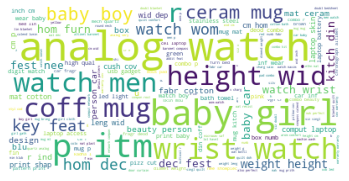

In [96]:
#On va encore un peu enrichir notre base de stopwords:

#On regarde à nouveau:
wordcloud.generate(" ".join(bags['words_string']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


#on garde rs par exemple, marque de composant électronique et cm qui peut représenter une discrimination entre catégorie


In [97]:
bags['categorie 1'].unique()

array(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '], dtype=object)

In [98]:
def cat(x):
    if x=='Home Furnishing ':
        return 1
    if x=='Kitchen & Dining ':
        return 2
    if x=='Computers ':
        return 3
    if x=='Beauty and Personal Care ':
        return 4
    if x=='Watches ':
        return 5
    if x=='Baby Care ':
        return 6
    else:
        return 7

In [99]:
bags['cluster']=bags['categorie 1'].apply(lambda x:cat(x))

In [100]:
bags['cluster'][i]

6

In [217]:
bags['words_string']

0       eleg polyest multicol abstract eyelet door cur...
1       sathiya cotton bath towel p sathiya cotton bat...
2       eurosp cotton terry fac towel p itmeg shbrpubh...
3       santosh roy fash cotton print king siz doubl b...
4       jaip print cotton flor king siz doubl bedsheet...
                              ...                        
1045    or empow extr larg self adher stick p itm zgzg...
1046    wallmantr larg vinyl stick p itmec fxheshyg st...
1047    uberlyf extr larg pig polyvinyl film import st...
1048    wallmantr med vinyl stick p itmec gxdsfhzb sti...
1049    uberlyf larg vinyl stick p itm zepqqzr jt sti ...
Name: words_string, Length: 1050, dtype: object

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize,stop_words=sw)
values = tfidf.fit_transform(bags['words_string'])


/home/samuel/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [102]:
#C'est pas mal mais on va essayer de réduire la dimension:
X=values.toarray()

In [103]:
tsne=TSNE(n_components=2)
X_trans=tsne.fit_transform(X)

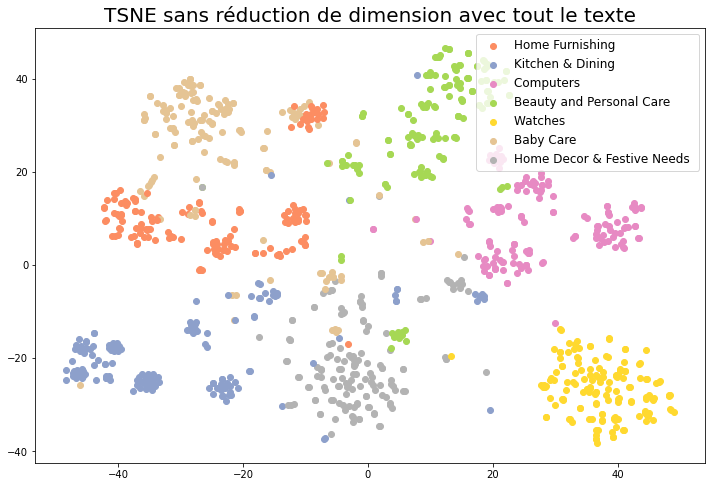

In [104]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(12,8))
for i in range(bags.shape[0]):
    cat=bags['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '),prop={'size':12})
plt.title('TSNE sans réduction de dimension avec tout le texte',size=20)
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

In [105]:
print(X)
print(X.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1050, 6840)


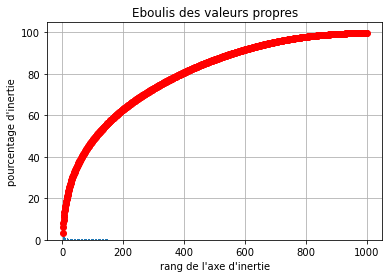

In [106]:
from sklearn import decomposition
from sklearn.decomposition import PCA
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.grid()
    plt.show(block=False)
    
pca = decomposition.PCA(n_components=1000)
pca.fit(X)
display_scree_plot(pca)

In [107]:
pca = decomposition.PCA(n_components=600)
pca.fit(X)
X_proj = pca.transform(X)
print(X_proj.shape)

(1050, 600)


In [108]:
X_trans=tsne.fit_transform(X_proj)

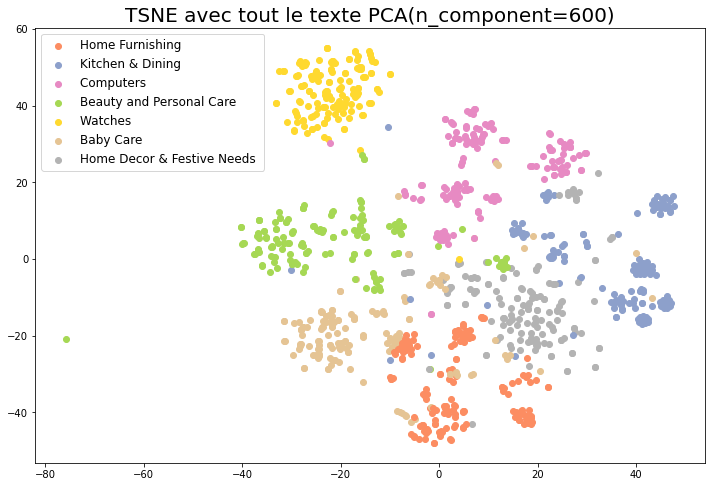

In [109]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(12,8))
for i in range(bags.shape[0]):
    cat=bags['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '),prop={'size':12})
plt.title('TSNE avec tout le texte PCA(n_component=600)',size=20)
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

In [110]:
#On essai plusieurs valeurs de n
from sklearn.decomposition import NMF

nmf=NMF(n_components=7)
X_nmf=nmf.fit_transform(X)

In [111]:
X_trans=tsne.fit_transform(X_nmf)

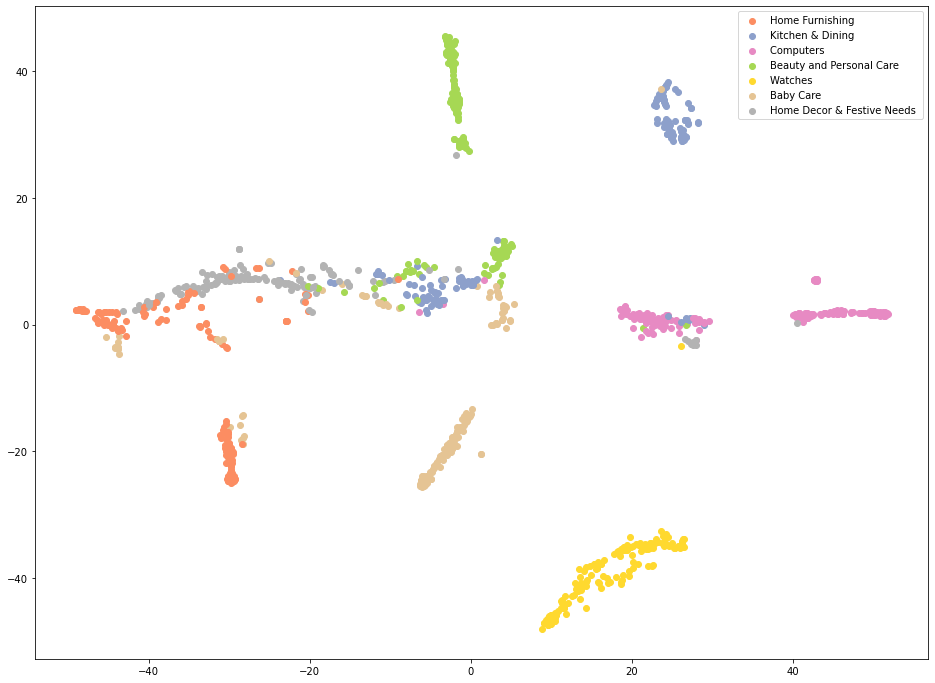

In [112]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(16,12))
for i in range(bags.shape[0]):
    cat=bags['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '))
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

In [113]:
#Au final on a un mélange non étonnant des catégories plus esthétiques
#On va regarder en enlevant les mots qui apparaissent très rarement et on éssaiera également de traiter le corpus
#avec des 2-grammes ou des 3-grammes voir si cela change quelque chose





In [114]:
bags.groupby('cluster')['words_string'].count()

cluster
1    150
2    150
3    150
4    150
5    150
6    150
7    150
Name: words_string, dtype: int64

In [115]:
#On a donc exactement 150 item par catégorie
#regardons la fréquence de répartition des mots:
texte_complet=' '.join(bags['words_string'])
d={}
for i in nltk.word_tokenize(texte_complet):
    if i not in d:
        d[i]=1
    else:
        d[i]+=1

In [116]:
len(d)

6876

In [117]:
#On va supprimer les mots présents moins de 10 fois (non vraiment représentatif d'un groupe)
#On va aussi supprimer ceux présents plus de 600 fois

In [118]:
sw2=[]
for i in d.keys():
    if d[i]<5:
        sw2.append(i)
len(sw2)

4763

In [119]:
sw2

['bkzdgthcts',
 'bkmffyhq',
 'environ',
 'wrinkl',
 'shrinkage',
 'app',
 'ste',
 'val',
 'apart',
 'thing',
 'welcom',
 'joy',
 'sooth',
 'amount',
 'sunlight',
 'asvtwl',
 'mediam',
 'shbrpubhca',
 'btweg',
 'shxtdb',
 'fa',
 'enrich',
 'deserv',
 'renown',
 'suscept',
 'itmejt',
 'uaqahahuf',
 'bdsejt',
 'uqwhdubh',
 'perfact',
 'goldbed',
 'itmejthnwahrnt',
 'machinewash',
 'waranty',
 'onl',
 'orig',
 'itmeayahfm',
 'kp',
 'wateayahs',
 'cucaym',
 'duhfcummh',
 'mzhwgbz',
 'uft',
 'tsw',
 'itmecffvcgfw',
 'watecffvgfzpad',
 'abroad',
 'wallet',
 'otherw',
 'mund',
 'timepiec',
 'watechfu',
 'qgfqejg',
 'az',
 'pray',
 'remind',
 'hijr',
 'greg',
 'calned',
 'qur',
 'bookmark',
 'alram',
 'ug',
 'cnhkdh',
 'wate',
 'ugfgkzkdjc',
 'swiss',
 'sapphir',
 'itmecgpst',
 'hdxjz',
 'mtg',
 'understand',
 'approach',
 'execut',
 'els',
 'itmeak',
 'svbtvm',
 'wateak',
 'ruk',
 'ffczdxw',
 'fkkh',
 'itmedbvhefg',
 'watedbvhq',
 'ajx',
 'itmedfhaphf',
 'yy',
 'watedfharg',
 'yspc',
 'girlswa

In [120]:
#On met à jour nos bag of wrods avec ces nouveaux stop words:
sw2+=sw

In [121]:
len(sw2)

5273

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize,stop_words=sw2)
values = tfidf.fit_transform(bags['words_string'])


/home/samuel/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [123]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2)

In [124]:
X_trans=tsne.fit_transform(values)

In [125]:
X_trans

array([[16.754702  , -9.074803  ],
       [25.929235  ,  2.9819994 ],
       [22.930824  ,  3.695792  ],
       ...,
       [ 2.0499952 ,  4.11718   ],
       [ 0.79926383,  2.5402794 ],
       [ 1.8188671 ,  3.9371042 ]], dtype=float32)

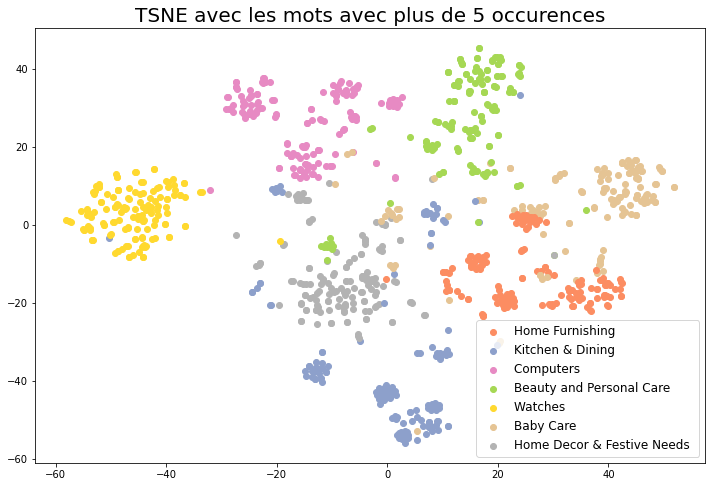

In [126]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(12,8))
for i in range(bags.shape[0]):
    cat=bags['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '),loc='lower right',prop={'size':12})
plt.title('TSNE avec les mots avec plus de 5 occurences',size=20)
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

In [127]:
#c'est un peu moins mélangé, on va tenter les PCA et NMF voir ce que cela donne:


In [128]:
#C'est pas mal mais on va essayer de réduire la dimension:
X=values.toarray()

In [129]:
print(X)
print(X.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1050, 2086)


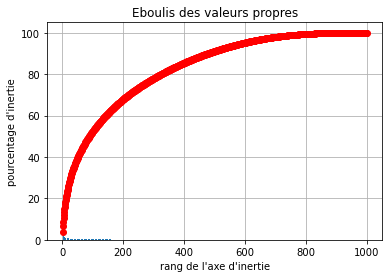

In [130]:
from sklearn import decomposition
from sklearn.decomposition import PCA
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.grid()
    plt.show(block=False)
    
pca = decomposition.PCA(n_components=1000)
pca.fit(X)
display_scree_plot(pca)

In [131]:
pca = decomposition.PCA(n_components=800)
pca.fit(X)
X_proj = pca.transform(X)
print(X_proj.shape)

(1050, 800)


In [132]:
X_trans=tsne.fit_transform(X_proj)

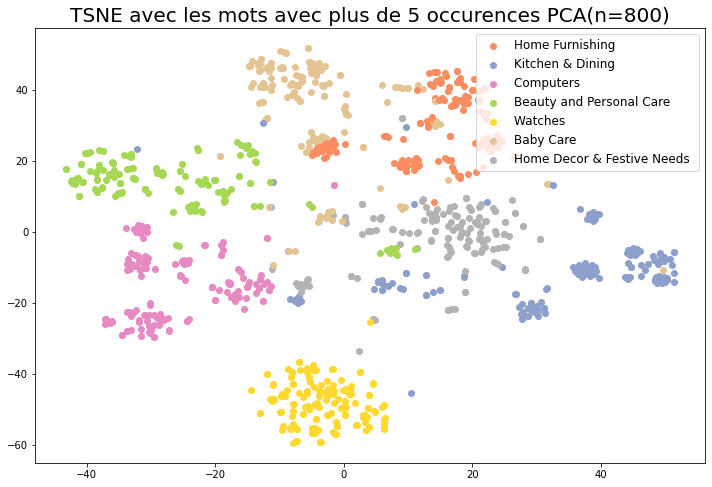

In [133]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(12,8))
for i in range(bags.shape[0]):
    cat=bags['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '),loc='upper right',prop={'size':12})
plt.title('TSNE avec les mots avec plus de 5 occurences PCA(n=800)',size=20)
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

In [134]:
#On essai plusieurs valeurs de n
from sklearn.decomposition import NMF

nmf=NMF(n_components=10)
X_nmf=nmf.fit_transform(X)

In [135]:
X_trans=tsne.fit_transform(X_nmf)

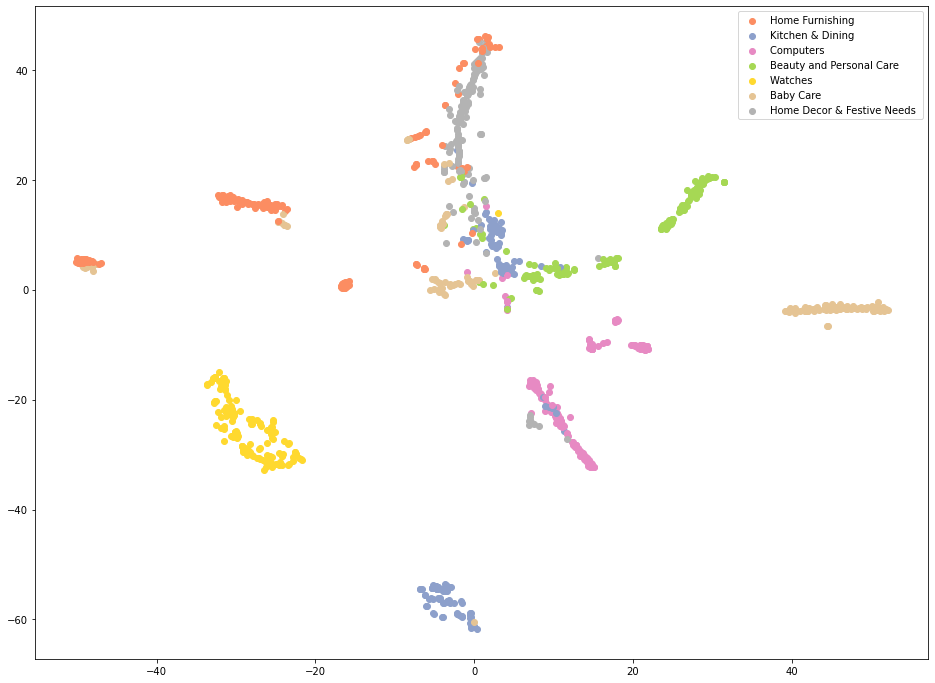

In [136]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(16,12))
for i in range(bags.shape[0]):
    cat=bags['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '))
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

In [137]:
#On essai également en enlevant les mots présents plus de 600 fois voir ce que cela donne:

In [138]:
sw2=[]
for i in d.keys():
    if d[i]<10 or d[i]>200:
        sw2.append(i)
len(sw2)

5741

In [139]:
#On met à jour nos bag of wrods avec ces nouveaux stop words:
sw2+=sw

In [140]:
len(sw2)

6251

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize,stop_words=sw2)
values = tfidf.fit_transform(bags['words_string'])


/home/samuel/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [142]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2)

In [143]:
X_trans=tsne.fit_transform(values)

In [144]:
X_trans

array([[-11.5045595,  41.683437 ],
       [  4.3920603,  18.87965  ],
       [  4.848418 ,  14.432634 ],
       ...,
       [ 26.79057  , -11.2434435],
       [ 28.181026 ,  -8.531182 ],
       [ 26.855965 , -11.063249 ]], dtype=float32)

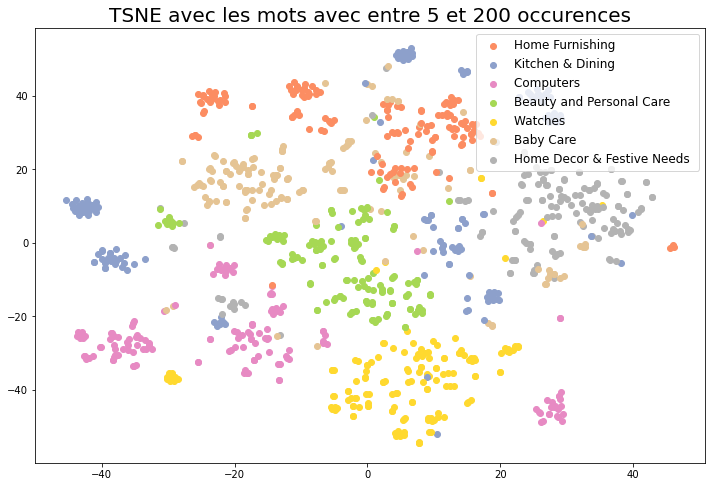

In [145]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(12,8))
for i in range(bags.shape[0]):
    cat=bags['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '),loc='upper right',prop={'size':12})
plt.title('TSNE avec les mots avec entre 5 et 200 occurences',size=20)
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

In [146]:
#c'est un peu moins mélangé, on va tenter les PCA et NMF voir ce que cela donne:


In [147]:
#C'est pas mal mais on va essayer de réduire la dimension:
X=values.toarray()

In [148]:
print(X)
print(X.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1050, 1118)


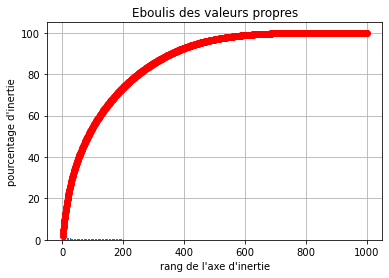

In [149]:
from sklearn import decomposition
from sklearn.decomposition import PCA
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.grid()
    plt.show(block=False)
    
pca = decomposition.PCA(n_components=1000)
pca.fit(X)
display_scree_plot(pca)

In [150]:
pca = decomposition.PCA(n_components=600)
pca.fit(X)
X_proj = pca.transform(X)
print(X_proj.shape)

(1050, 600)


In [151]:
X_trans=tsne.fit_transform(X_proj)

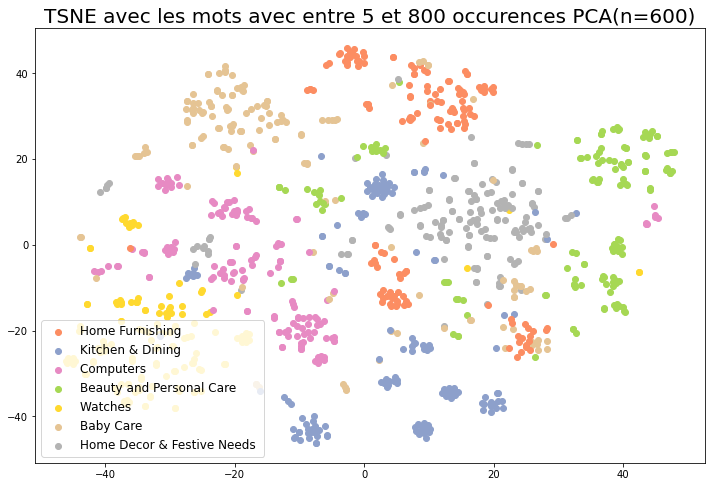

In [152]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(12,8))
for i in range(bags.shape[0]):
    cat=bags['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '),loc='lower left',prop={'size':12})
plt.title('TSNE avec les mots avec entre 5 et 800 occurences PCA(n=600)',size=20)
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

In [153]:
#On essai plusieurs valeurs de n
from sklearn.decomposition import NMF

nmf=NMF(n_components=7)
X_nmf=nmf.fit_transform(X)

In [154]:
X_trans=tsne.fit_transform(X_nmf)

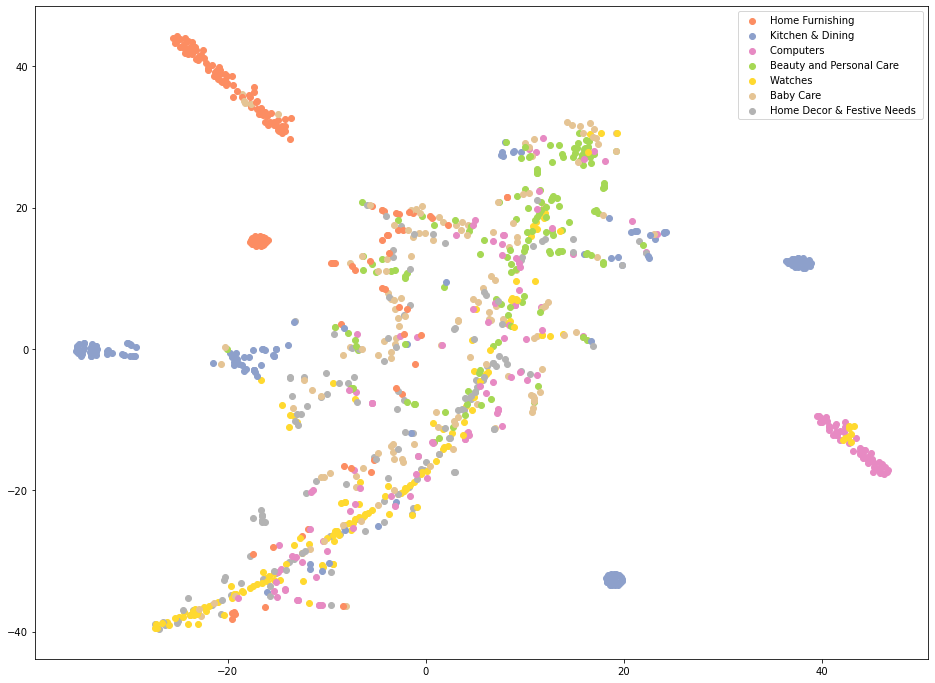

In [155]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(16,12))
for i in range(bags.shape[0]):
    cat=bags['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '))
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

In [156]:
#On effectue une LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 7

tf_vect=CountVectorizer(stop_words=sw2,ngram_range=(2,2))
tf=tf_vect.fit_transform(bags['words_string'])

# Créer le modèle LDA
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=6, learning_method='batch')

# Fitter sur les données
lda.fit(tf)

LatentDirichletAllocation(max_iter=6, n_components=7)

In [157]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, tf_vect.get_feature_names(), no_top_words)


Topic 0:
hp pavil pavil dv quilt comfort bottl nutcas led bulb ml bottl stick wrap bulb led otg en spf pa
Topic 1:
door curtain arom comfort comfort polyest eyelet door self eyelet vinyl stick mass cream party wed curtain arom fruit mass
Topic 2:
microwav saf cre rockmantr thrilling yet yet fresh giv thrilling stay perm porcelain craft ens stay start exclud year mak
Topic 3:
fit regul inf wear wear cloth neck shirt min klub sonat ym printland pmr look styl pizz cut printland ad
Topic 4:
vgn cr pizz cut charg vaio vaio sery cr adapt smartpro charg sery vgn appl macbook vaio vgn fest nee
Topic 5:
wok kadha din cookw stainless steel fest nee pot pan cookw pot pan wok wild ston hard anod kadha din
Topic 6:
mous pad fest nee lal havel timewel timewel pad shap doubl bedsheet top pyjam lik mak holiday che catchy mean


In [158]:
#Au final on a un mélange non étonnant des catégories plus esthétiques
#On va regarder en enlevant les mots qui apparaissent très rarement et on éssaiera également de traiter le corpus
#avec des 2-grammes ou des 3-grammes voir si cela change quelque chose

# Bi grammes

In [159]:
tf=TfidfVectorizer(tokenizer=nltk.word_tokenize,stop_words=sw2,ngram_range=(2,2))
bigr=tf.fit_transform(bags['words_string'])

/home/samuel/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [160]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2)

In [161]:
X_trans=tsne.fit_transform(bigr)

In [162]:
X_trans

array([[ -7.6209283, -20.592144 ],
       [ 30.335545 , -14.357327 ],
       [ 29.893415 , -13.401949 ],
       ...,
       [-20.328941 ,   5.8392773],
       [-20.947319 ,   2.783295 ],
       [-20.425697 ,   5.2415466]], dtype=float32)

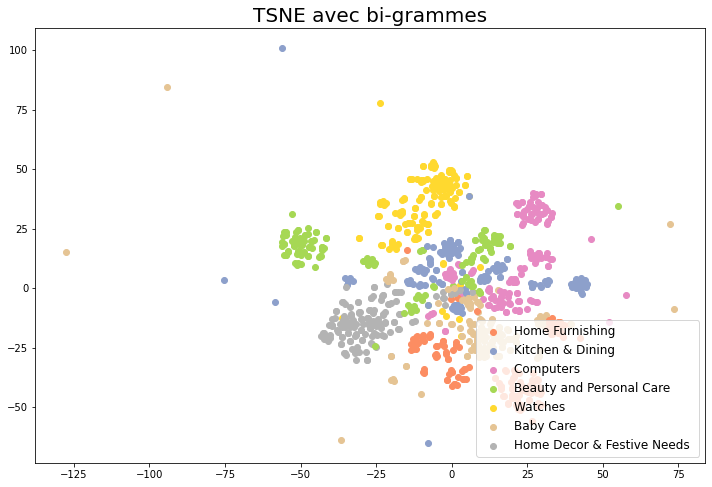

In [163]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(12,8))
for i in range(bags.shape[0]):
    cat=bags['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '),loc='lower right',prop={'size':12})
plt.title('TSNE avec bi-grammes',size=20)
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

In [164]:
#C'est beaucoup mieux.

In [165]:
#on va tenter les PCA et NMF voir ce que cela donne:


In [166]:
#C'est pas mal mais on va essayer de réduire la dimension:
X=bigr.toarray()

In [167]:
print(X)
print(X.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1050, 13775)


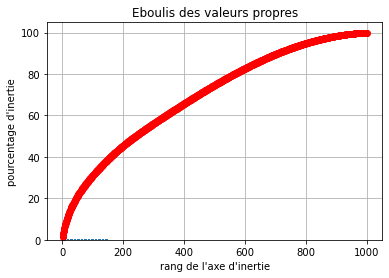

In [168]:
from sklearn import decomposition
from sklearn.decomposition import PCA
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.grid()
    plt.show(block=False)
    
pca = decomposition.PCA(n_components=1000)
pca.fit(X)
display_scree_plot(pca)

In [169]:
pca = decomposition.PCA(n_components=1000)
pca.fit(X)
X_proj = pca.transform(X)
print(X_proj.shape)

(1050, 1000)


In [170]:
X_trans=tsne.fit_transform(X_proj)

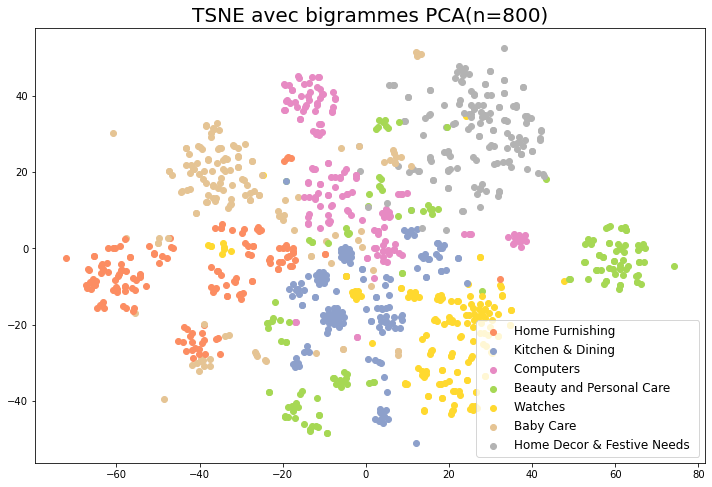

In [171]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(12,8))
for i in range(bags.shape[0]):
    cat=bags['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '),loc='lower right',prop={'size':12})
plt.title('TSNE avec bigrammes PCA(n=800)',size=20)
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

In [172]:
#On essai plusieurs valeurs de n
from sklearn.decomposition import NMF

nmf=NMF(n_components=20)
X_nmf=nmf.fit_transform(X)

In [173]:
X_trans=tsne.fit_transform(X_nmf)

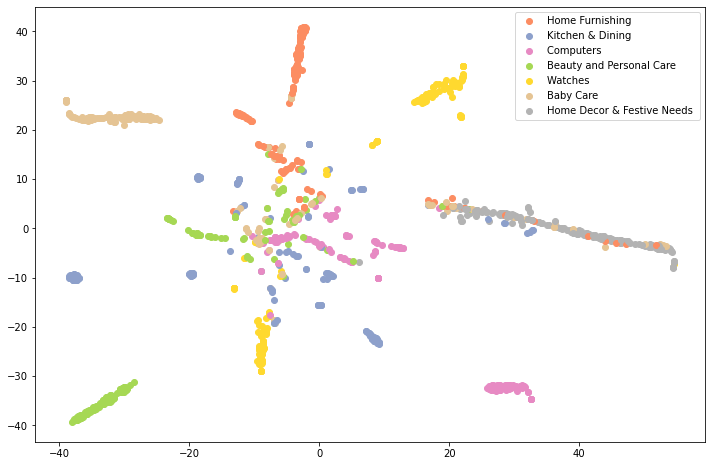

In [174]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(12,8))
for i in range(bags.shape[0]):
    cat=bags['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '))
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

In [175]:
#On effectue une LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 6

tf_vect=CountVectorizer(stop_words=sw2,ngram_range=(2,2))
tf=tf_vect.fit_transform(bags['words_string'])

# Créer le modèle LDA
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=6, learning_method='batch')

# Fitter sur les données
lda.fit(tf)

LatentDirichletAllocation(max_iter=6, n_components=6)

In [176]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, tf_vect.get_feature_names(), no_top_words)


Topic 0:
vgn cr charg vaio doubl bedsheet sery vgn vaio sery smartpro charg cr adapt prith prith led bulb vaio vgn
Topic 1:
mass cream pavil dv hp pavil neck shirt fruit mass cream vitamin maxim maxim dv cel kit oxyglow wild ston
Topic 2:
fest nee appl macbook vinyl stick quilt comfort furn bed religy idol nee showpiec quilt doh bed quilt magsaf charg
Topic 3:
mous pad wok kadha bath bath pad shap printland pmr fragr deod person fragr look styl togeth also styl eleg
Topic 4:
pizz cut door curtain arom comfort comfort polyest timewel timewel stainless steel bottl nutcas self eyelet ml bottl quilt comfort
Topic 5:
microwav saf exclud cre yet fresh perm year pick lov stay perm cre rockmantr fresh start porcelain craft rockmantr porcelain


In [177]:
#c'est toujours pas fameux mais c'est un peu mieux

In [178]:
#On essai les tri-gram:


In [179]:
tf=TfidfVectorizer(tokenizer=nltk.word_tokenize,stop_words=sw2,ngram_range=(3,3))
trigr=tf.fit_transform(bags['words_string'])

/home/samuel/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [180]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2)

In [181]:
X_trans=tsne.fit_transform(trigr)

In [182]:
X_trans

array([[ 0.43075117, -0.4118762 ],
       [ 6.082121  ,  1.7558674 ],
       [-0.3072783 , -0.22383323],
       ...,
       [-5.1206117 ,  1.3568686 ],
       [-6.98695   ,  0.97024184],
       [-6.0858684 ,  1.2459018 ]], dtype=float32)

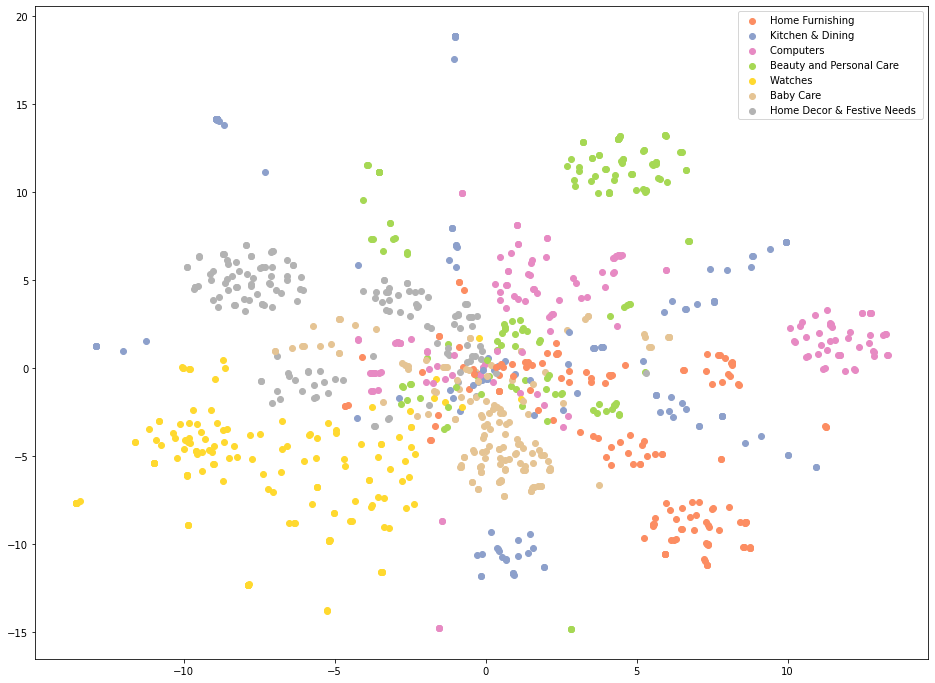

In [183]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(16,12))
for i in range(bags.shape[0]):
    cat=bags['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '))
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

In [184]:
#C'est moins bien

In [185]:
#on va tenter les PCA et NMF voir ce que cela donne:


In [186]:
#C'est pas mal mais on va essayer de réduire la dimension:
X=trigr.toarray()

In [187]:
print(X)
print(X.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1050, 19518)


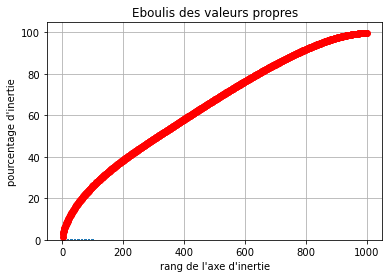

In [188]:
from sklearn import decomposition
from sklearn.decomposition import PCA
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.grid()
    plt.show(block=False)
    
pca = decomposition.PCA(n_components=1000)
pca.fit(X)
display_scree_plot(pca)

In [189]:
pca = decomposition.PCA(n_components=800)
pca.fit(X)
X_proj = pca.transform(X)
print(X_proj.shape)

(1050, 800)


In [190]:
X_trans=tsne.fit_transform(X_proj)

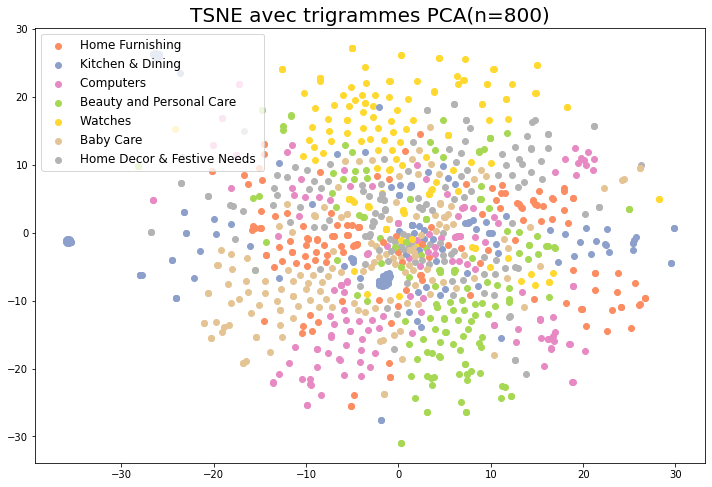

In [191]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(12,8))
for i in range(bags.shape[0]):
    cat=bags['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '),loc='upper left',prop={'size':12})
plt.title('TSNE avec trigrammes PCA(n=800)',size=20)
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

In [192]:
# La aussi, toujours pas trop ça...

In [193]:
#Au final on part sur une PCA pour la réduction de dimention après une tokenisation en bigrammes

In [194]:
bags.head()

categorie 1                                       words_string  \
0  Home Furnishing   eleg polyest multicol abstract eyelet door cur...   
1        Baby Care   sathiya cotton bath towel p sathiya cotton bat...   
2        Baby Care   eurosp cotton terry fac towel p itmeg shbrpubh...   
3  Home Furnishing   santosh roy fash cotton print king siz doubl b...   
4  Home Furnishing   jaip print cotton flor king siz doubl bedsheet...   

   cluster  
0        1  
1        6  
2        6  
3        1  
4        1

In [195]:
#regardons des clustering naif par kmeans

In [196]:
tf=TfidfVectorizer(tokenizer=nltk.word_tokenize,stop_words=sw2,ngram_range=(2,2))
bigr=tf.fit_transform(bags['words_string'])

/home/samuel/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [197]:
values=bigr.toarray()
#On applique une PCA de 1000:
pca = decomposition.PCA(n_components=1000)
pca.fit(values)
X_proj = pca.transform(values)
print(X_proj.shape)

(1050, 1000)


In [198]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2)

In [199]:
X_trans=tsne.fit_transform(X_proj)

In [200]:
X_trans

array([[  2.1131403, -22.549887 ],
       [ 12.234518 , -41.198456 ],
       [ 25.777878 , -53.023014 ],
       ...,
       [-16.61115  ,  11.517998 ],
       [-13.989717 ,  13.575775 ],
       [-16.160269 ,  12.02683  ]], dtype=float32)

In [201]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score,silhouette_score,davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

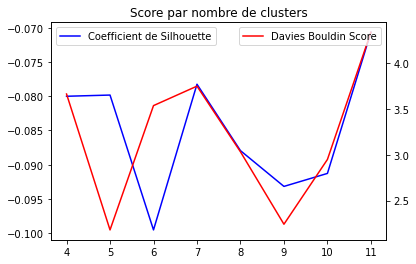

In [202]:
silhouette=[]
DB=[]

for i in range(4,12):
    
    X=MinMaxScaler().fit_transform(X_proj)
    
    km=KMeans(n_clusters=i)
    km.fit(X)
    y=km.predict(X)
    silhouette.append(silhouette_score(X,y))
    DB.append(davies_bouldin_score(X,y))
     
sil=plt.plot(range(4,12),silhouette,c='b')
plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
ax2 = pyplot.gca().twinx()
db=plt.plot(range(4,12),DB,c='r')
plt.legend(db,['Davies Bouldin Score'],loc='upper right')
plt.title('Score par nombre de clusters')
    
plt.show()
    

In [203]:
X=MinMaxScaler().fit_transform(X_proj)

In [204]:
#On se tente un kmean de 7:


km=KMeans(n_clusters=10)
km.fit(X)
y=km.predict(X)
print(silhouette_score(X,y),davies_bouldin_score(X,y))



-0.11009617865689 2.2104791931249066


In [205]:
y[155]

5

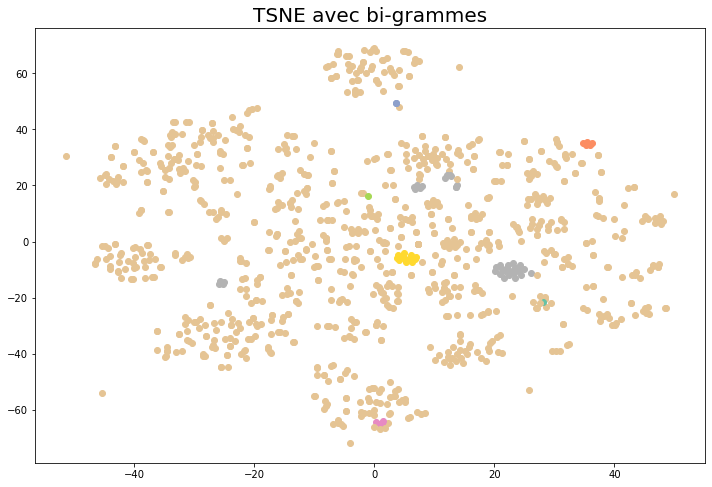

In [206]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(12,8))
for i in range(bags.shape[0]):
    for j in range(10):
        cat=y[i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.title('TSNE avec bi-grammes',size=20)
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

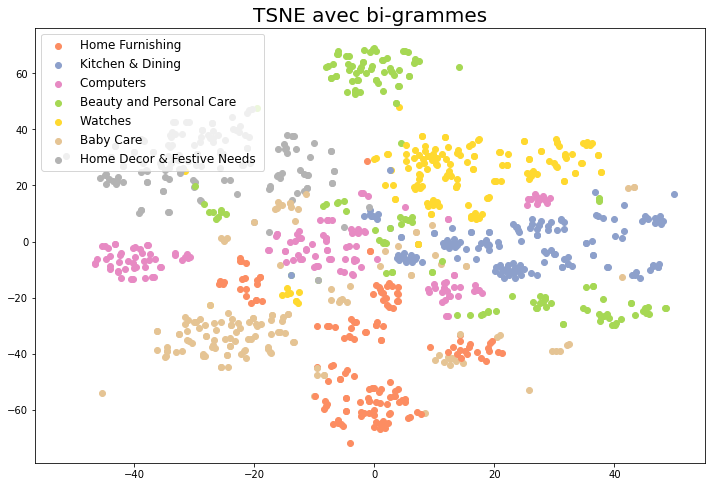

In [207]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(12,8))
for i in range(bags.shape[0]):
    cat=bags['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '),loc='upper left',prop={'size':12})
plt.title('TSNE avec bi-grammes',size=20)
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

In [208]:
tf=TfidfVectorizer(tokenizer=nltk.word_tokenize,stop_words=sw2,ngram_range=(2,2))
bigr=tf.fit_transform(bags['words_string'])

/home/samuel/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [209]:
X=bigr.toarray()

In [210]:
#On essai plusieurs valeurs de n
from sklearn.decomposition import NMF

nmf=NMF(n_components=30)
X_nmf=nmf.fit_transform(X)

In [211]:
X_trans=tsne.fit_transform(X_nmf)

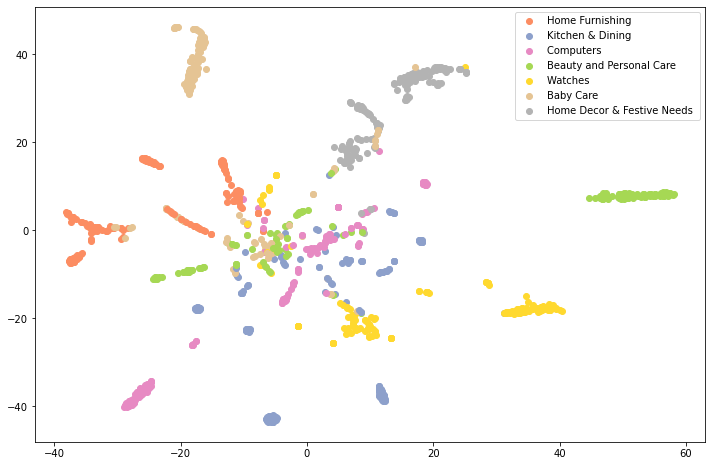

In [212]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(12,8))
for i in range(bags.shape[0]):
    cat=bags['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '))
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

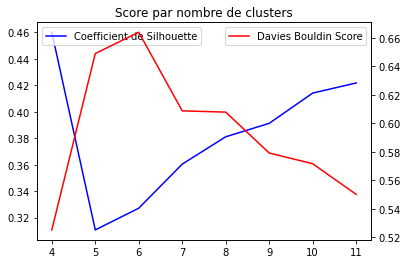

In [213]:
silhouette=[]
DB=[]

for i in range(4,12):
    
    X=MinMaxScaler().fit_transform(X_nmf)
    
    km=KMeans(n_clusters=i)
    km.fit(X)
    y=km.predict(X)
    silhouette.append(silhouette_score(X,y))
    DB.append(davies_bouldin_score(X,y))
     
sil=plt.plot(range(4,12),silhouette,c='b')
plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
ax2 = pyplot.gca().twinx()
db=plt.plot(range(4,12),DB,c='r')
plt.legend(db,['Davies Bouldin Score'],loc='upper right')
plt.title('Score par nombre de clusters')
    
plt.show()

In [214]:
#On se tente un kmean de 7:


km=KMeans(n_clusters=8)
km.fit(X_nmf)
y=km.predict(X_nmf)
print(silhouette_score(X_nmf,y),davies_bouldin_score(X_nmf,y))



0.4228323087246195 0.4986179289740097


In [215]:
y[155]

2

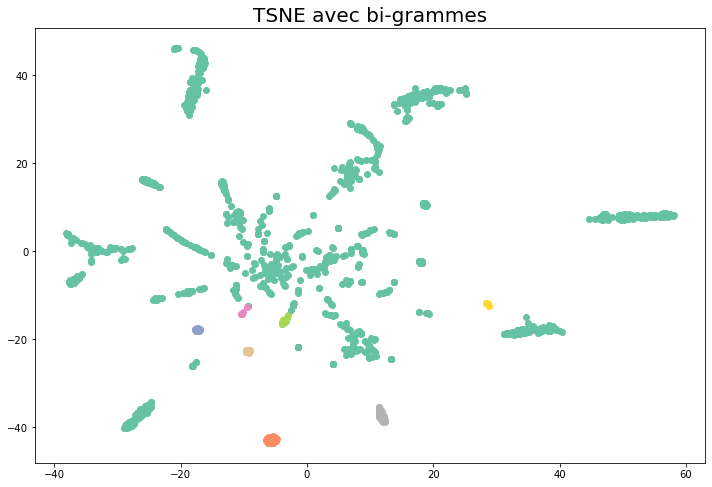

In [216]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(12,8))
for i in range(bags.shape[0]):
    for j in range(10):
        cat=y[i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.title('TSNE avec bi-grammes',size=20)
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()